# FreshBite Sales Prediction

### Data Cleaning

In [136]:
# Load the data

import pandas as pd
import numpy as np 

df = pd.read_csv('FreshBite_Sales_20241203.csv')
df.head()

,Unnamed: 0,Date,Customer ID,Sales Volume,Sales Revenue,Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,0,2022-10-01,CUST002,1,1000,Tier 2,North America,Summer,Yes,8.0
1,1,2022-10-01,CUST003,4,4000,Tier 1,Europe,Summer,Yes,8.0
2,2,2022-10-01,CUST005,3,3000,Tier 1,North America,Summer,No,6.0
3,3,2022-10-01,CUST006,1,1000,Tier 2,Europe,Summer,No,9.0
4,4,2022-10-01,CUST008,5,5000,Tier 2,North America,Summer,Yes,3.0


In [137]:
# Check the number of rows and columns 

df.shape

(651, 10)

In [138]:
# Column names in the data

df.columns

Index(['Unnamed: 0', 'Date', 'Customer ID', 'Sales Volume', 'Sales Revenue',
       'Pricing Tier', 'Region', 'Season', 'Promotion Applied',
       'Delivery Time (Days)'],
      dtype='object')

In [139]:
# Remove the unneccessary column 

df = df.drop(columns=['Unnamed: 0'])


In [140]:
# Renaming the columns

df = df.rename(columns={'Date': 'Order Date', 'Sales Volume': 'Sales Volumn (pallet/s)'})
df.head()

,Order Date,Customer ID,Sales Volumn (pallet/s),Sales Revenue,Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,1000,Tier 2,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,4000,Tier 1,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,3,3000,Tier 1,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,1000,Tier 2,Europe,Summer,No,9.0
4,2022-10-01,CUST008,5,5000,Tier 2,North America,Summer,Yes,3.0


In [141]:
# Checking data type of columns

df.dtypes

Order Date                  object
Customer ID                 object
Sales Volumn (pallet/s)     object
Sales Revenue                int64
Pricing Tier                object
Region                      object
Season                      object
Promotion Applied           object
Delivery Time (Days)       float64
dtype: object

In [142]:
# convert the data type of columns

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Customer ID'] = df['Customer ID'].astype('string')
df['Pricing Tier'] = df['Pricing Tier'].astype('string')
df['Region'] = df['Region'].astype('string')
df['Season'] = df['Season'].astype('string')
df['Promotion Applied'] = df['Promotion Applied'].astype('string')

In [143]:
# Convert the data type from Object to the float

# df['Sales Volumn (pallet/s)'] = pd.to_numeric(df['Sales Volumn (pallet/s)'], errors='coerce')


In [144]:
# After converting the data type of the columns

df.dtypes

Order Date                 datetime64[ns]
Customer ID                string[python]
Sales Volumn (pallet/s)            object
Sales Revenue                       int64
Pricing Tier               string[python]
Region                     string[python]
Season                     string[python]
Promotion Applied          string[python]
Delivery Time (Days)              float64
dtype: object

In [145]:
# To get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               651 non-null    datetime64[ns]
 1   Customer ID              651 non-null    string        
 2   Sales Volumn (pallet/s)  651 non-null    object        
 3   Sales Revenue            651 non-null    int64         
 4   Pricing Tier             651 non-null    string        
 5   Region                   627 non-null    string        
 6   Season                   651 non-null    string        
 7   Promotion Applied        651 non-null    string        
 8   Delivery Time (Days)     622 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), string(5)
memory usage: 45.9+ KB


In [146]:
# Check the value count of the sales volumn column

df['Sales Volumn (pallet/s)'].value_counts()

Sales Volumn (pallet/s)
3             102
4              97
1              90
5              90
6              86
8              61
7              53
2              34
9              14
10             11
3 Pallet/s      4
8 Pallet/s      3
4 Pallet/s      2
2 Pallet/s      1
5 Pallet/s      1
1 Pallet/s      1
7 Pallet/s      1
Name: count, dtype: int64

In [147]:
# Remove the unwanted value form the sales vloumn column

df['Sales Volumn (pallet/s)'] = df['Sales Volumn (pallet/s)'].str.replace(' Pallet/s', '', regex=False)
df['Sales Volumn (pallet/s)'].value_counts()


Sales Volumn (pallet/s)
3     106
4      99
1      91
5      91
6      86
8      64
7      54
2      35
9      14
10     11
Name: count, dtype: int64

In [148]:
# Changing the data type of the Sales Volumn column into integer

df['Sales Volumn (pallet/s)'] = pd.to_numeric(df['Sales Volumn (pallet/s)'], errors='coerce')


In [166]:
# Check the value count of the Season column

df['Season'].value_counts()

Season
Summer    422
Winter    200
summer     21
winter      8
Name: count, dtype: Int64

In [168]:
# Capitalize all the values

df['Season'] = df['Season'].str.capitalize()
df['Season'].value_counts()

Season
Summer    443
Winter    208
Name: count, dtype: Int64

In [149]:
df.dtypes

Order Date                 datetime64[ns]
Customer ID                string[python]
Sales Volumn (pallet/s)             int64
Sales Revenue                       int64
Pricing Tier               string[python]
Region                     string[python]
Season                     string[python]
Promotion Applied          string[python]
Delivery Time (Days)              float64
dtype: object

In [150]:
# Fill the Missing Values

In [151]:
#To count missing values in each column
df.isnull().sum()

Order Date                  0
Customer ID                 0
Sales Volumn (pallet/s)     0
Sales Revenue               0
Pricing Tier                0
Region                     24
Season                      0
Promotion Applied           0
Delivery Time (Days)       29
dtype: int64

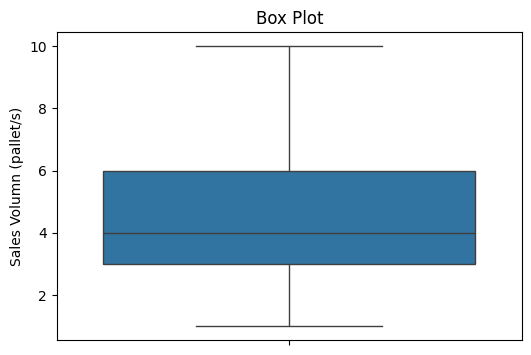

In [152]:
# Check the outlier to fill the missing values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Sales Volumn (pallet/s)'])
plt.title('Box Plot')
plt.show()

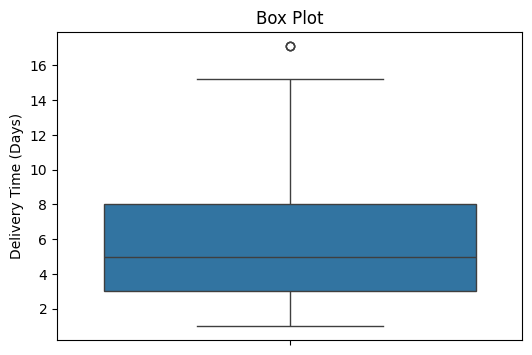

In [153]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Delivery Time (Days)'])
plt.title('Box Plot')
plt.show()

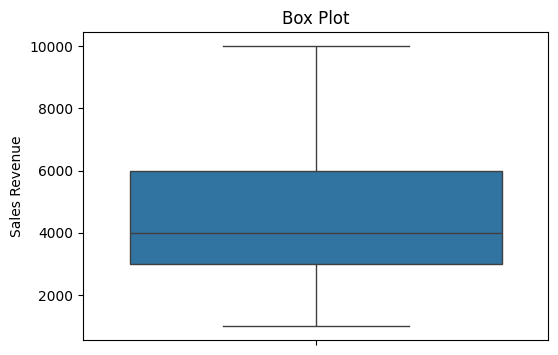

In [154]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Sales Revenue'])
plt.title('Box Plot')
plt.show()

In [155]:
#To count missing values in each column

df.isnull().sum()

Order Date                  0
Customer ID                 0
Sales Volumn (pallet/s)     0
Sales Revenue               0
Pricing Tier                0
Region                     24
Season                      0
Promotion Applied           0
Delivery Time (Days)       29
dtype: int64

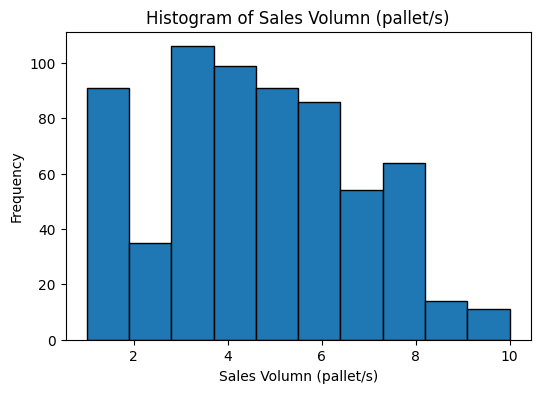

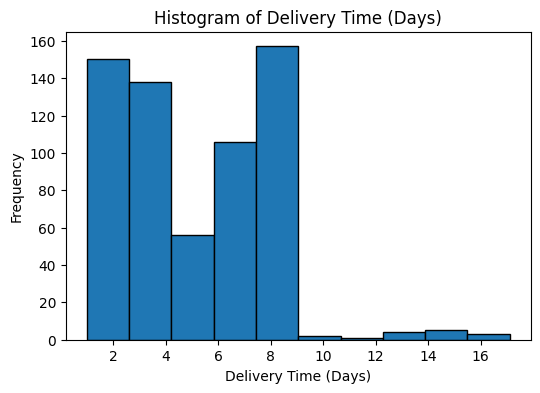

In [156]:
# Check the distribution of the column to fill the missing values

plt.figure(figsize=(6, 4))
plt.hist(df['Sales Volumn (pallet/s)'],edgecolor='black')
plt.title('Histogram of Sales Volumn (pallet/s)')
plt.xlabel('Sales Volumn (pallet/s)')
plt.ylabel('Frequency')

plt.figure(figsize=(6, 4))
plt.hist(df['Delivery Time (Days)'],edgecolor='black')
plt.title('Histogram of Delivery Time (Days)')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')

plt.show()

In [157]:
# Check the skewness of the Delivery Time column

skewness = df['Delivery Time (Days)'].skew()
print(f"Skewness of Demand_Units: {skewness}")

Skewness of Demand_Units: 0.6068726085628887


In [158]:
# Fill the missig vlues by mean, median and mode

df['Sales Volumn (pallet/s)'] = df['Sales Volumn (pallet/s)'].fillna(df['Sales Volumn (pallet/s)'].mean())
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Delivery Time (Days)'] = df['Delivery Time (Days)'].fillna(df['Delivery Time (Days)'].median())


In [159]:
# After filling the missing values

df.isnull().sum()

Order Date                 0
Customer ID                0
Sales Volumn (pallet/s)    0
Sales Revenue              0
Pricing Tier               0
Region                     0
Season                     0
Promotion Applied          0
Delivery Time (Days)       0
dtype: int64

In [160]:
# Checking the duplicate rows in data

df.duplicated().any()
df.head()

,Order Date,Customer ID,Sales Volumn (pallet/s),Sales Revenue,Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,1000,Tier 2,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,4000,Tier 1,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,3,3000,Tier 1,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,1000,Tier 2,Europe,Summer,No,9.0
4,2022-10-01,CUST008,5,5000,Tier 2,North America,Summer,Yes,3.0


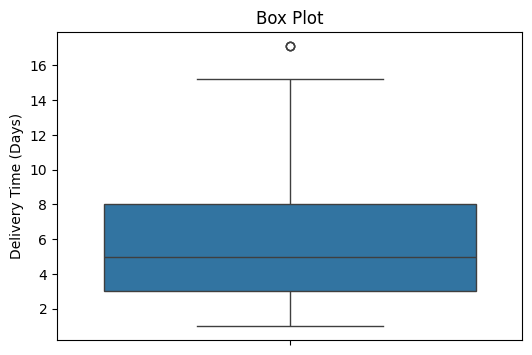

In [161]:
# Checking Outlier

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Delivery Time (Days)'])
plt.title('Box Plot')
plt.show()

In [162]:
# Remove Outlier

Q1 = df['Delivery Time (Days)'].quantile(0.25)
Q3 = df['Delivery Time (Days)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = df[(df['Delivery Time (Days)'] >= lower_bound) & (df['Delivery Time (Days)'] <= upper_bound)]



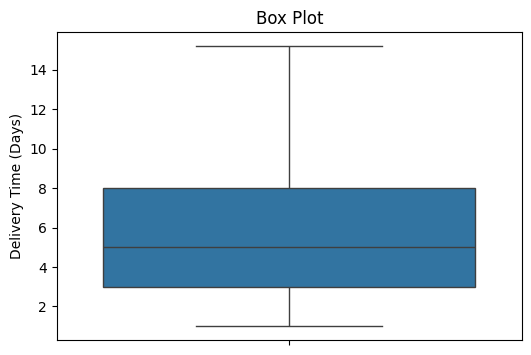

In [163]:
# After removing outliers

plt.figure(figsize=(6, 4))
sns.boxplot(data=new_df['Delivery Time (Days)'])
plt.title('Box Plot')
plt.show()

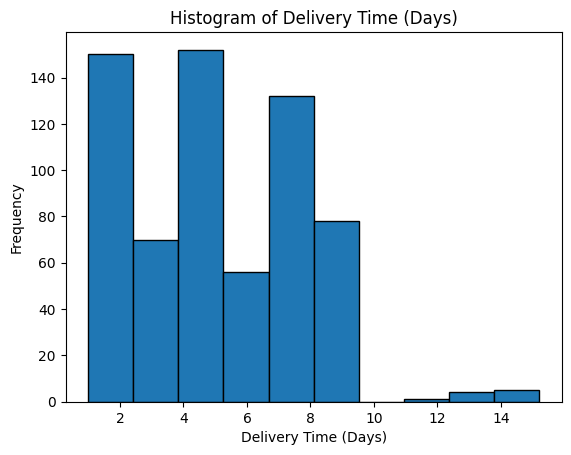

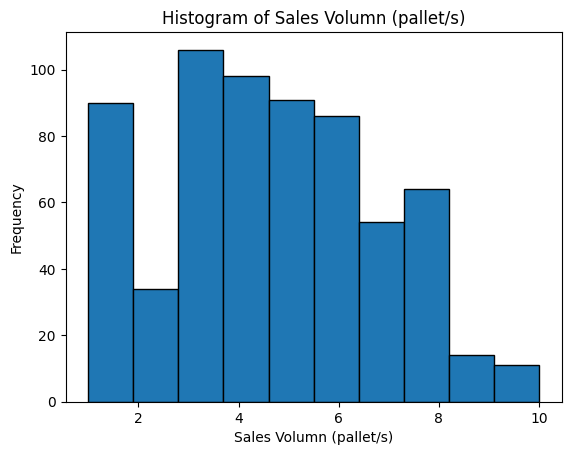

In [164]:
# Check the normality of data

import matplotlib.pyplot as plt

plt.hist(new_df['Delivery Time (Days)'], edgecolor='black')
plt.title('Histogram of Delivery Time (Days)')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()

plt.hist(new_df['Sales Volumn (pallet/s)'], edgecolor='black')
plt.title('Histogram of Sales Volumn (pallet/s)')
plt.xlabel('Sales Volumn (pallet/s)')
plt.ylabel('Frequency')
plt.show()

In [165]:
new_df.head()

,Order Date,Customer ID,Sales Volumn (pallet/s),Sales Revenue,Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,1000,Tier 2,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,4000,Tier 1,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,3,3000,Tier 1,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,1000,Tier 2,Europe,Summer,No,9.0
4,2022-10-01,CUST008,5,5000,Tier 2,North America,Summer,Yes,3.0
